# Results Example

In [1]:
%run -i train.py

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
-------- Model structure --------
-------- Actor --------
Actor(
  (batchnorm_input): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm_layers): ModuleList(
    (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden_layers): ModuleList(
    (0): Linear(in_features=24, out_features=256, bias=False)
    (1): Linear(in_features=256, out_features=128, bias=False)
  )
  (output): Linear(in_features=128, out_features=2, bias=True)
)
-------- Critic -------
Critic(
  (bn0): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fcs1): Linear(in_features=48, out_features=256, bias=False)
  (fcs2): Linear

In [4]:
env.close()

## Summary

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 10

%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
f = open("scores/scores_maddpg.txt","rb")
scores1 = pickle.load(f)

In [16]:
def plot_scores(scores, filename, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, color='skyblue')
    ax.axhline(y=0.5,linestyle='--', color='gray')
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean, color='blue')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    if filename:
        plt.savefig(filename, transparent=True, dpi=300)

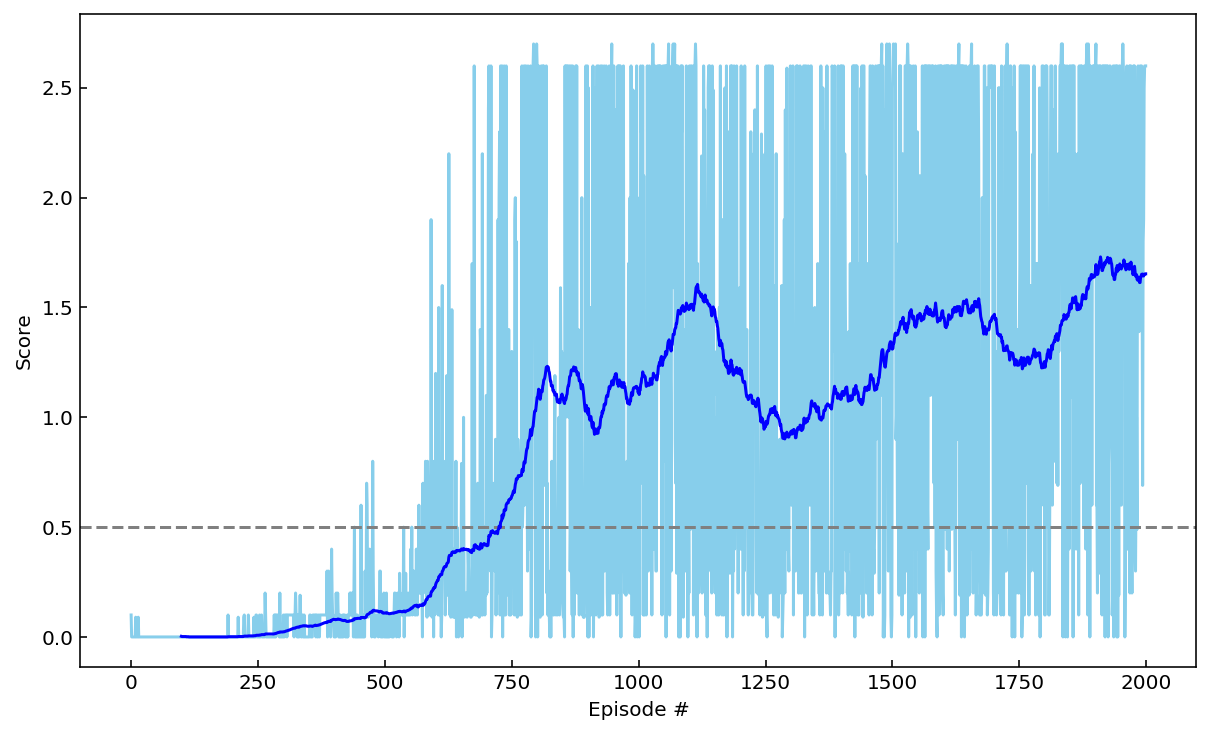

In [18]:
plot_scores(scores1, filename="MADDPG.png")

Text(0.5, 0, 'Episode #')

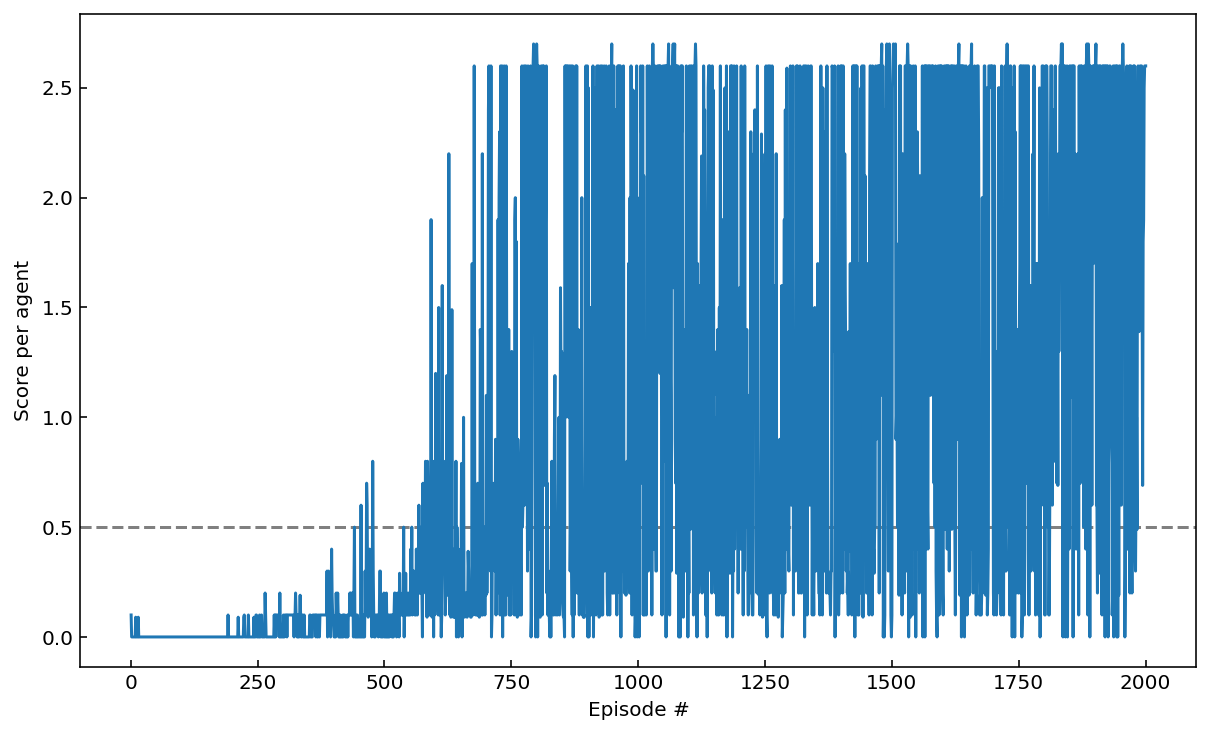

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.axhline(y=0.5,linestyle='--', color='gray')
plt.plot(np.arange(1, len(scores1)+1), scores1)
plt.ylabel('Score per agent')
plt.xlabel('Episode #')
#plt.savefig("MADDPG.png", transparent=True, dpi=300)